# 6주차 5조 팀프로젝트_0803~0804                              신민수
    ● 노인 일자리 정책 황성화 필요성 및 개선방안 : 노령인구 자살률과 일자리의 환경의 관계 
OECD_DATA    : https://data.oecd.org/searchresults/?hf=20&b=0&l=en&s=score  
국가지표체계   : https://www.index.go.kr/unify/main.do?clasCd=10  
공공데이터포털: https://www.data.go.kr/index.do  
국가통계포털   : https://kosis.kr/index/index.do    

---
### [ 목차 ]  
#### 1. 외국과 비교한 국내 노령인구의 자살률 및 기대수명
#### 2. 노령인구 자살 원인 분석 
#### 3. 노령인구 은퇴시기 환경 분석(임금 만족도, 고용률, 사회적 지지)
#### 4. 노령인구의 일자리 중요성
#### 5. 결론

In [3]:
from function import blog_search 
import pandas as pd
import	matplotlib.pyplot as plt
import platform
import	pymysql
import	re
import random

In [10]:

def connect_sql(db, table, col_list):
    import	pymysql
    conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
    db= f'{db}',	charset='utf8')
    curs	=	conn.cursor()
    sql =	f"""select * from {table}"""
    curs.execute(sql)
    rows	=curs.fetchall()	
    df=pd.DataFrame(rows,columns=col_list)
    return df
    conn.commit()
    conn.close()


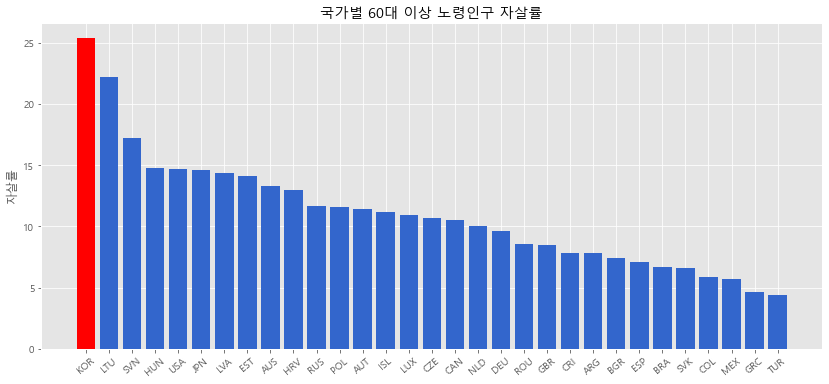

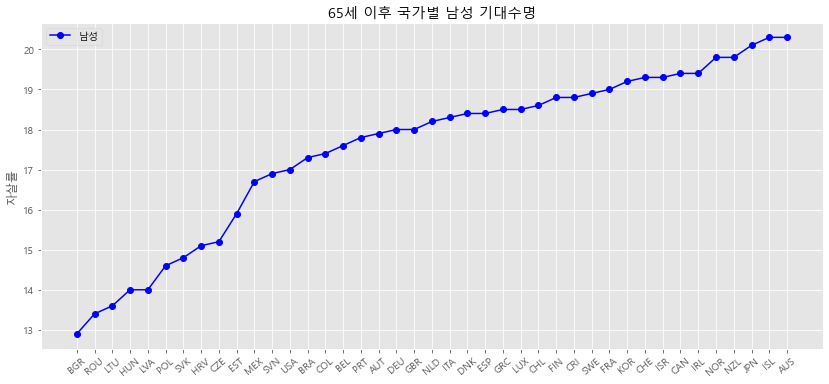

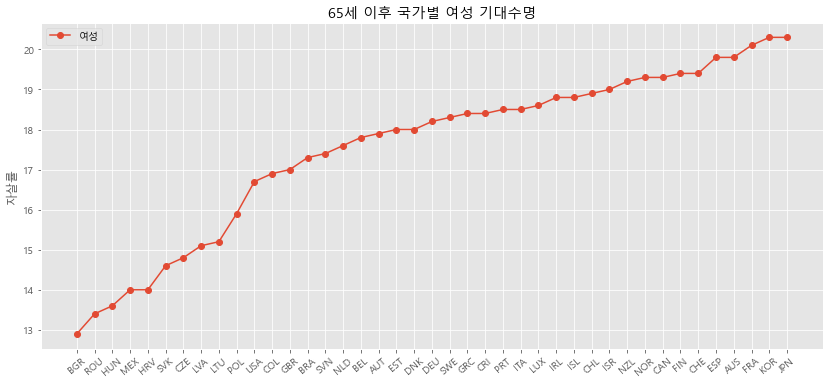

In [56]:
# 노인 자살률과 기대수명
conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db='teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql ="""SELECT LOCATION,Value FROM suicide_rate ORDER BY Value DESC;"""
curs.execute(sql)
rows	=curs.fetchall()	
df_suicide=pd.DataFrame(rows,columns=['국가','자살률'])

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
    
colors = ['red']
for i in range(30):
    colors.append('#3366CC')
    
plt.figure(figsize=(14,6))
plt.bar(df_suicide['국가'], df_suicide['자살률'],color=colors)
plt.title('국가별 60대 이상 노령인구 자살률')
#plt.xlabel('기간')
plt.ylabel('자살률')
plt.xticks(ticks=df_suicide['국가'], labels=df_suicide['국가'], rotation=40)
#plt.legend()
plt.show()

# 남자 기대 수명 데이터
conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db='teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql ="""SELECT LOCATION,Value FROM life_expectancy_at
WHERE SUBJECT = 'MEN' ORDER BY Value ;"""
curs.execute(sql)
rows	=curs.fetchall()	
df_lifeExpectancy_men=pd.DataFrame(rows,columns=['국가','기대 수명'])


# 여자 기대 수명 데이터
conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db='teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql ="""SELECT LOCATION,Value FROM life_expectancy_at
WHERE SUBJECT = 'WOMEN' ORDER BY Value ;"""
curs.execute(sql)
rows	=curs.fetchall()	
df_lifeExpectancy_women=pd.DataFrame(rows,columns=['국가','기대 수명'])


# 국가별 total 데이터 내림차순으로 국가이름 컬럼 지정
# conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
# db='teamproject6',	charset='utf8')
# curs	=	conn.cursor()
# sql ="""SELECT LOCATION FROM life_expectancy
# WHERE SUBJECT = 'TOT' ORDER BY Value ;"""
# curs.execute(sql)
# rows	=curs.fetchall()	
# df_lifeExpectancy_country=pd.DataFrame(rows,columns=['국가'])

# 여자데이터 리스트 음수로 전환
# idx=0
# for i in df_lifeExpectancy_women['기대 수명']:
#     i=-i
#     df_lifeExpectancy_women['기대 수명'][idx]=i
#     idx +=1
# print(df_lifeExpectancy_women)    
# 그래프 그리기
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

plt.figure(figsize=(14,6))
plt.plot(df_lifeExpectancy_men['국가'],	df_lifeExpectancy_men['기대 수명'],label='남성',color = 'b',marker='o')
plt.rcParams['axes.unicode_minus']	=	False
plt.title('65세 이후 국가별 남성 기대수명')
#plt.xlabel('기간')
plt.ylabel('자살률')
plt.xticks(ticks=df_lifeExpectancy_men['국가'], rotation=40)
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(df_lifeExpectancy_women['국가'],	df_lifeExpectancy_men['기대 수명'],label='여성',marker='o')
plt.rcParams['axes.unicode_minus']	=	False
plt.title('65세 이후 국가별 여성 기대수명')
#plt.xlabel('기간')
plt.ylabel('자살률')
plt.xticks(ticks=df_lifeExpectancy_men['국가'], rotation=40)
plt.legend()
plt.show()

#  1. 외국과 비교한 국내 노령인구의 자살률 및 기대수명
---
### ● 우리나라 자살률 1위
### ● 기대 수명(여자) 2위
### ● 기대 수명(남자) 11위

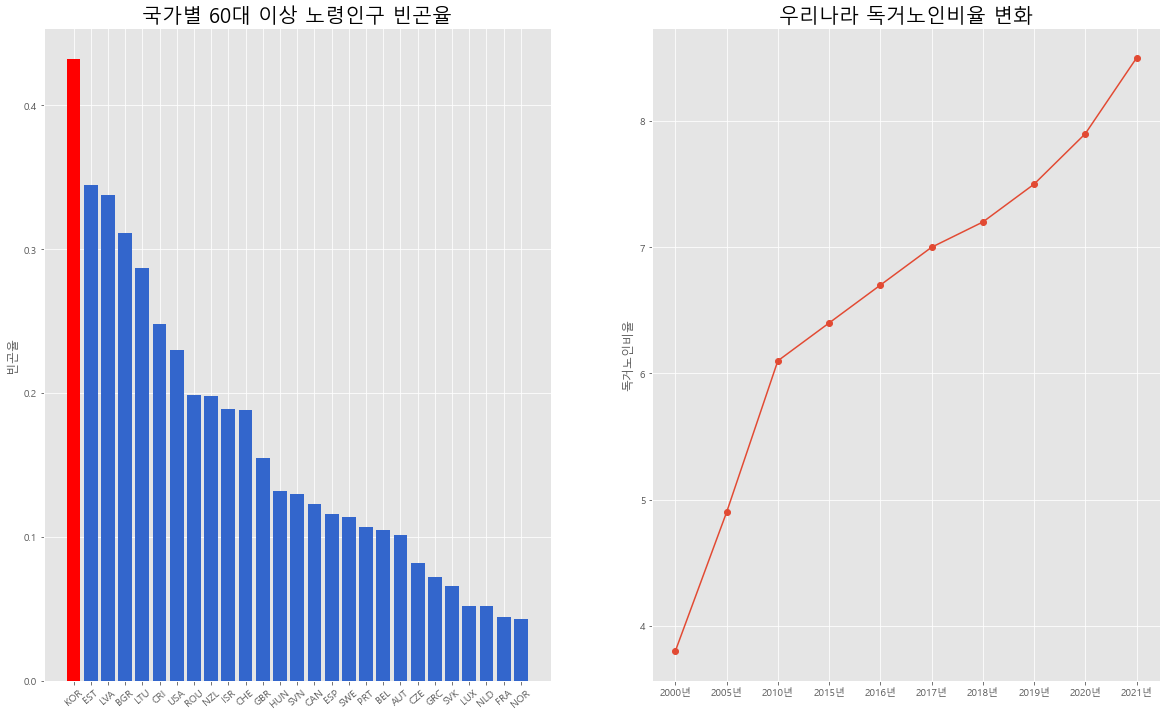

In [65]:
# 2. 노인 자살률 요인: 1. 경제 2. 고독,외로움

# 국가별 노인인구 빈곤률 데이터 불러오기
conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db= 'teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql =	f"""select * from poverty_rate order by Value DESC"""
curs.execute(sql)
rows	=curs.fetchall()	
df_poverty=pd.DataFrame(rows,columns=['국가','빈곤율'])
conn.commit()
conn.close()


# 국가별 노인인구 빈곤률 그래프
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')


# 국가별 노인인구 빈곤률, 독거노인비율 변화 서브플롯
fig, axes = plt.subplots(1,2, figsize=(20, 12))

plt.subplot(1,2,1)
colors = ['red']
for i in range(26):
    colors.append('#3366CC')
plt.bar(df_poverty['국가'], df_poverty['빈곤율'],color=colors)

plt.title('국가별 60대 이상 노령인구 빈곤율',fontsize=20)
plt.ylabel('빈곤율')
plt.style.use('ggplot')
plt.xticks(ticks=df_poverty['국가'], labels=df_poverty['국가'], rotation=40)


# 독거노인 비율 증가 데이트 불러오기

df_alone= connect_sql('teamproject6','독거노인비율',['지표','독거노인비율'])

#독거노인 비율 변화 그래프
plt.subplot(1,2,2)
plt.plot(df_alone['지표'],df_alone['독거노인비율'],marker='o')
plt.title('우리나라 독거노인비율 변화',fontsize=20)
plt.ylabel('독거노인비율')
plt.style.use('ggplot')
plt.show()

# 2.노령인구 자살의 원인 분석 
---
### ● 경제적인 이유 : 국제적 노령인구 빈곤율 1위
### ● 외로움/고독   : 매년 독거노인 비율 증가중 

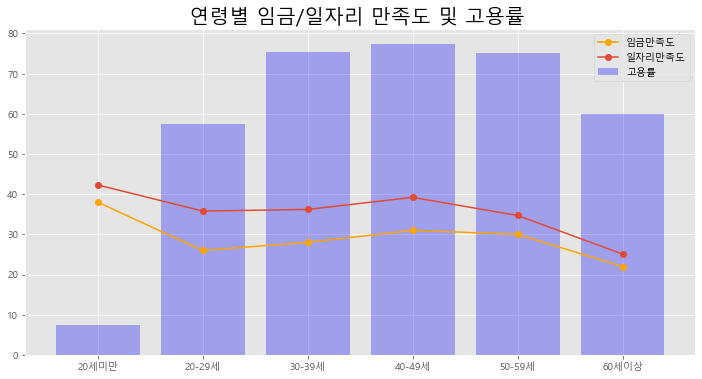

In [30]:
# 임금 만족도, 일자리만족도, 고용률 지표 분석
conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db='teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql ="""select age, 2021년 from 임금만족도;"""
curs.execute(sql)
rows	=curs.fetchall()	
df_임금만족도 = pd.DataFrame(rows,columns=['age','임금만족도'])

conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db='teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql ="""select age, 2021년 from 일자리만족도;"""
curs.execute(sql)
rows	=curs.fetchall()	
df_일자리만족도 = pd.DataFrame(rows,columns=['age','일자리만족도'])

conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db='teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql ="""select age, 2021년 from 고용률;"""
curs.execute(sql)
rows	=curs.fetchall()	
df_고용률 = pd.DataFrame(rows,columns=['age','고용률'])

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

#colors	=	['cornflowerblue','tomato','y','b','r']
plt.figure(figsize=(12,6))
plt.plot(df_임금만족도['age'],df_임금만족도['임금만족도'],marker='o',label='임금만족도',color='orange')
plt.plot(df_일자리만족도['age'],df_일자리만족도['일자리만족도'],marker='o',label='일자리만족도')
plt.bar(df_고용률['age'],df_고용률['고용률'],alpha=0.3,label='고용률',color='blue')
plt.title('연령별 임금/일자리 만족도 및 고용률 ',fontsize=20)
#plt.xlabel('기간')
#plt.ylabel('')
#plt.xticks(ticks=df_alone['지표'], labels=df_alone['지표'], rotation=40)
#plt.locator_params(axis='x', nbins=12)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


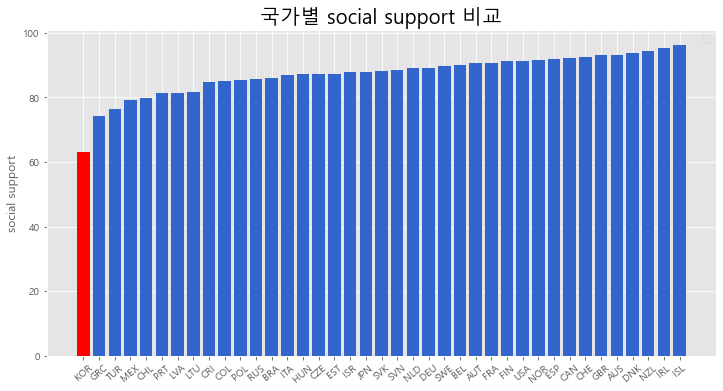

In [64]:
#connect_sql('teamproject6','social_support',['국가','연령대','사회적 지지'])

# old 그룹 사회적지지
conn	=	pymysql.connect(host='localhost',	user='root',	password='206477',
db='teamproject6',	charset='utf8')
curs	=	conn.cursor()
sql ="""SELECT LOCATION, Value FROM social_support
WHERE SUBJECT = 'OLD' ORDER BY Value ;"""
curs.execute(sql)
rows	=curs.fetchall()	
df_social_support_old = pd.DataFrame(rows,columns=['국가','social_support'])

# 사회적지지
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

# 한국 color 지정 설정
colors = ['red']    
for i in range(38):
    colors.append('#3366CC')

plt.figure(figsize=(12,6))

plt.bar(df_social_support_old['국가'], df_social_support_old['social_support'],color = colors)
plt.title('국가별 social support 비교',fontsize=20)
#plt.xlabel('기간')
plt.ylabel('social support')
plt.xticks(ticks=df_social_support_old['국가'], labels = df_social_support_old['국가'], rotation=40)
#plt.locator_params(axis='x', nbins=12)
plt.legend()
plt.show()

# 3. 노령인구 은퇴시기 환경 분석 및 관심도
---
### ● 임금만족도, 일자리 만족도, 고용률 : 50 ~ 60대 부근에서 급격히 감소
### ● 사회적 지지란? 대인관계를 통해 개인의 정서나 행동에 유리한 결과를 갖도록 정보 조언, 구체적인 원조를 포괄한 개념

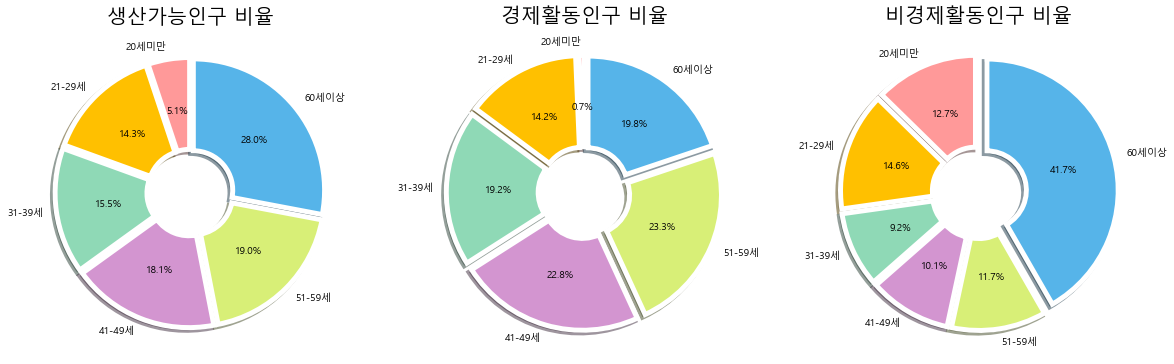

In [57]:
# 생사가능인구, 경제활동인구, 비경제활동인구 비율 파이 그래프 그리기
labels = ['20세미만', '21-29세', '31-39세', '41-49세','51-59세','60세이상']
colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#D8EF77','#56B4E9']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

df_pop =connect_sql('teamproject6','경제활동인구비율',['age','인구(천명)','경제활동인구(천명)','비경제활동인구(천명)'])

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

fig, axes = plt.subplots(1,3, figsize=(20, 12))

plt.subplot(1,3,1)
plt.pie(df_pop['인구(천명)'],autopct = '%.1f%%',startangle=90,colors=colors,explode = [0.03, 0.03, 0.03, 0.03,0.03,0.03],shadow=True,wedgeprops = wedgeprops,labels=labels)
plt.title('생산가능인구 비율',fontsize=20)

plt.subplot(1,3,2)
plt.pie(df_pop['경제활동인구(천명)'],autopct = '%.1f%%',startangle=90,colors=colors,explode = [0.05, 0.05, 0.05, 0.05,0.05,0.05],shadow=True,wedgeprops = wedgeprops,labels=labels)
plt.title('경제활동인구 비율',fontsize=20)

plt.subplot(1,3,3)
plt.pie(df_pop['비경제활동인구(천명)'],autopct = '%.1f%%',startangle=90,colors=colors,explode = [0.05, 0.05, 0.05, 0.05,0.05,0.07],shadow=True,wedgeprops = wedgeprops,labels=labels)
plt.title('비경제활동인구 비율',fontsize=20)

plt.show()

# 4. 노령인구의 일자리 중요성
---
### ● 생산가능인구에서 가장 높은 비율
### ● 현재 65세를 일이 가능한 인구로 규정 -> 개선필요 

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


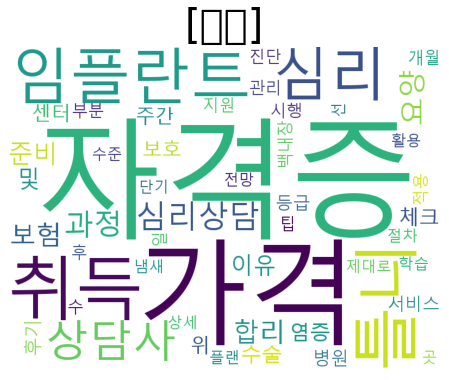

In [4]:
# 블로그 서치를 통한 노인 관련 키워드 분석: 노인 일자리에 대한 관심이 떠오르는 화제임을 알 수 있음
blog_search('노인')

# [ 결론 ]
---
### - 노인 일자리 확대는 높은 노령인구 자살률을 막을 수 있는 방법 
### - 생산인구, 경제활동인구로서도 활용할 수 있는 기회  
